In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Polygon, Point
from shapely.geometry import Point, LineString
from shapely.wkt import loads

In [2]:
otaz = pd.read_csv('Data_with_TAZ/merged_data_otaz.csv')
dtaz = pd.read_csv('Data_with_TAZ/merged_data_dtaz.csv')
points = pd.read_csv('Data_with_TAZ/points_lon_lat.csv')

In [3]:
# Example path to a shapefile containing county polygons
shapefile_path = 'shape/sfbay-tazs-epsg-26910.shp'

# Load the shapefile
counties_gdf = gpd.read_file(shapefile_path)

# Filter or process the GeoDataFrame as needed, for example, to select specific counties


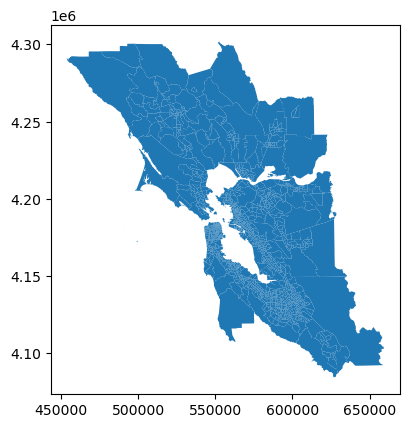

In [4]:
# Plot the GeoDataFrame
counties_gdf.plot()

# Show the plot
plt.show()


In [5]:
# Example DataFrame for points
# Replace these with your actual longitude and latitude columns
longitude_dtaz = list(dtaz['lon'])
latitude_dtaz = list(dtaz['lat'])


# Create GeoDataFrame for points
gdf_points_dtaz = gpd.GeoDataFrame(geometry=[Point(xy) for xy in zip(longitude_dtaz, latitude_dtaz)])
gdf_points_dtaz['index_reserve'] = gdf_points_dtaz.index


# Example DataFrame for points
# Replace these with your actual longitude and latitude columns
longitude_otaz = list(otaz['lon'])
latitude_otaz = list(otaz['lat'])


# Create GeoDataFrame for points
gdf_points_otaz = gpd.GeoDataFrame(geometry=[Point(xy) for xy in zip(longitude_otaz, latitude_otaz)])
gdf_points_otaz['index_reserve'] = gdf_points_otaz.index

# Assuming you already have a GeoDataFrame for polygons called gdf_polygons
# If not, you need to create it from your polygon data

In [6]:
# Transform both geometries to WGS 84 (EPSG:4326)
counties_gdf = counties_gdf.to_crs("EPSG:4326")

In [7]:
# Merge dtaz with counties_gdf
merged_gdf_dtaz = gpd.sjoin(gdf_points_dtaz, counties_gdf, how='inner', op='within')

# Merge otaz with counties_gdf
merged_gdf_otaz = gpd.sjoin(gdf_points_otaz, counties_gdf, how='inner', op='within')

final_result = merged_gdf_otaz.merge(merged_gdf_dtaz, on='index_reserve')


/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/bd/fq3z0ph13ms3dnbk1fhkkpkw0000gn/T/ipykernel_61015/1781481723.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_gdf_dtaz = gpd.sjoin(gdf_points_dtaz, counties_gdf, how='inner', op='within')
/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/bd/fq3z0ph13ms3dnbk1fhk

In [8]:
final_result['count'] = final_result.groupby(['taz1454_x', 'taz1454_y']).transform('size')

# Keep only one row for each pair
final_result = final_result.drop_duplicates(subset=['taz1454_x', 'taz1454_y'])

final_result_sorted = final_result.sort_values(by='count', ascending=False)

# Keep only the top 100 rows
final_result_100 = final_result_sorted.head(100)
final_result_100.to_csv('final_result_100.csv', index=False)

In [9]:
final_result_100.head(5)

,geometry_x,index_reserve,index_right_x,objectid_x,taz1454_x,district_x,county_x,gacres_x,Shape__Are_x,Shape__Len_x,geometry_y,index_right_y,objectid_y,taz1454_y,district_y,county_y,gacres_y,Shape__Are_y,Shape__Len_y,count
6973699,POINT (-121.73752 37.93462),4108189,841,842,1178,24,Contra Costa,15339.802023,0.003951,0.341447,POINT (-121.73752 37.93462),841,842,1178,24,Contra Costa,15339.802023,0.003951,0.341447,19455
5722423,POINT (-121.79225 37.81837),1053704,881,882,1176,23,Contra Costa,119054.526626,0.030713,0.935815,POINT (-121.79225 37.81837),881,882,1176,23,Contra Costa,119054.526626,0.030713,0.935815,14405
8343007,POINT (-121.67019 37.93532),4078589,840,841,1179,24,Contra Costa,15612.147621,0.004021,0.292662,POINT (-121.67019 37.93532),840,841,1179,24,Contra Costa,15612.147621,0.004021,0.292662,8765
9035742,POINT (-121.62999 37.88083),4203524,731,732,1177,24,Contra Costa,70015.111047,0.018046,1.221286,POINT (-121.62999 37.88083),731,732,1177,24,Contra Costa,70015.111047,0.018046,1.221286,8119
8696925,POINT (-123.12075 38.78060),8155744,335,336,1402,31,Sonoma,88168.265787,0.022444,0.899434,POINT (-123.12075 38.78060),335,336,1402,31,Sonoma,88168.265787,0.022444,0.899434,7524


In [10]:
final_100_df = pd.read_csv('final_result_100.csv')

# change geometry_x from string to Shapely 
final_100_df['geometry_x'] = final_100_df['geometry_x'].apply(loads)
final_100_df['geometry_y'] = final_100_df['geometry_y'].apply(loads)
final_100_gdf = final_100_df
final_100_gdf.to_csv('final_100_gdf.csv', index=False)


# construct geoDataFrame for Point x y
x_points_gdf = final_100_gdf[['geometry_x', 'count', 'taz1454_x']].copy()
x_points_gdf = gpd.GeoDataFrame(x_points_gdf, geometry='geometry_x')

y_points_gdf = final_100_gdf[['geometry_y', 'count', 'taz1454_y']].copy()
y_points_gdf = gpd.GeoDataFrame(y_points_gdf, geometry='geometry_y')

In [11]:
x_points_gdf.head(5)

,geometry_x,count,taz1454_x
0,POINT (-121.73752 37.93462),19455,1178
1,POINT (-121.79225 37.81837),14405,1176
2,POINT (-121.67019 37.93532),8765,1179
3,POINT (-121.62999 37.88083),8119,1177
4,POINT (-123.12075 38.78060),7524,1402


In [12]:
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Create a new GeoDataFrame for line segments
points_gdf = gpd.GeoDataFrame(columns=['geometry', 'count'])
lines_gdf = gpd.GeoDataFrame(columns=['geometry', 'count'])

# Iterate through each row and create a LineString connecting the points
for i in range(len(x_points_gdf)):
    count = x_points_gdf.iloc[i]['count']
    x_point = x_points_gdf.iloc[i]['geometry_x']
    y_point = y_points_gdf.iloc[i]['geometry_y']
    
    # Check if 'taz1454_x' is equal to 'taz1454_y'
    if x_points_gdf.iloc[i]['taz1454_x'] == y_points_gdf.iloc[i]['taz1454_y']:
        point = Point(float(x_point.x), float(y_point.y))
        points_gdf = points_gdf.append({'geometry': point, 'count': count}, ignore_index=True)

        
    else:
        # Create LineString from the two points
        line = LineString([x_point, y_point])

        # Add the line to the GeoDataFrame along with the count value
        lines_gdf = lines_gdf.append({'geometry': line, 'count': count}, ignore_index=True)

points_gdf.to_csv('points_gdf.csv', index=False)

/var/folders/bd/fq3z0ph13ms3dnbk1fhkkpkw0000gn/T/ipykernel_61015/3613028032.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points_gdf = points_gdf.append({'geometry': point, 'count': count}, ignore_index=True)
/var/folders/bd/fq3z0ph13ms3dnbk1fhkkpkw0000gn/T/ipykernel_61015/3613028032.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points_gdf = points_gdf.append({'geometry': point, 'count': count}, ignore_index=True)
/var/folders/bd/fq3z0ph13ms3dnbk1fhkkpkw0000gn/T/ipykernel_61015/3613028032.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  points_gdf = points_gdf.append({'geometry': point, 'count': count}, ignore_index=True)
/var/folders/bd/fq3z0ph13ms3dnbk1fhkkpkw0000gn/T/ipykernel_61015/3613028032.py:19: Fu

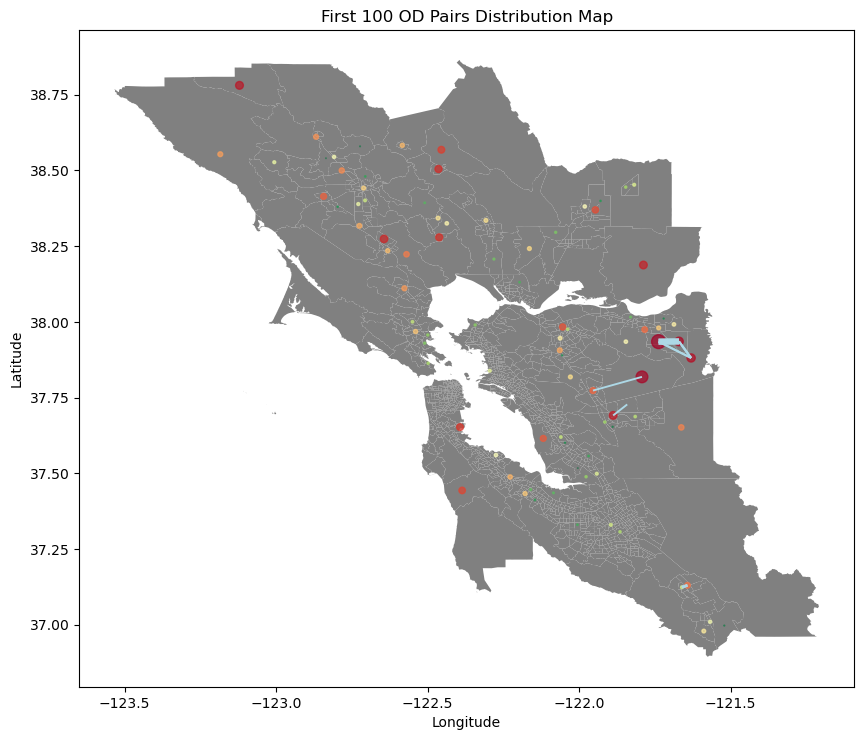

In [13]:

# normalize count for appropriate markersize
norm = Normalize(vmin=points_gdf['count'].min(), vmax=points_gdf['count'].max())
points_gdf['normalized_count'] = points_gdf['count'].apply(norm)

# draw distribution map
fig, ax = plt.subplots(figsize=(10, 10))
counties_gdf.plot(ax=ax, color='grey')

# GeoDataFrame plot
points_gdf.plot(ax=ax, markersize=points_gdf['normalized_count'] * 100, alpha=0.7, cmap='RdYlGn', legend=True)
lines_gdf.plot(ax=ax, linewidth=lines_gdf['count']/1500, color='lightblue', legend=True, label='Connections')

plt.title('First 100 OD Pairs Distribution Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('OD_distribution_map.png')
plt.show()

In [ ]:
# Assuming gdf_points and gdf_polygons are already defined
# Example spatial join - points within polygons
joined = gpd.sjoin(gdf_points_dtaz, counties_gdf, how='inner', op='within')

# Count the number of points within each polygon
points_count = joined.groupby(joined.index_right).size()

# Create a new DataFrame from the counts (to ensure correct merging with gdf_polygons)
counts_df = points_count.reset_index(name='points_count')

# Rename columns if necessary to match your gdf_polygons
# counts_df.rename(columns={'index_right': 'your_polygon_id_column'}, inplace=True)

# Merge the counts back into the original polygons GeoDataFrame
gdf_polygons = counties_gdf.merge(counts_df, left_index=True, right_on='index_right', how='left')

# Fill NaN values with 0 if there are polygons with no points within them
gdf_polygons['points_count'].fillna(0, inplace=True)

# add density column 
gdf_polygons['density'] = gdf_polygons['points_count'] / gdf_polygons['area']


# Now, gdf_polygons contains a new column 'points_count' with the number of points within each polygon


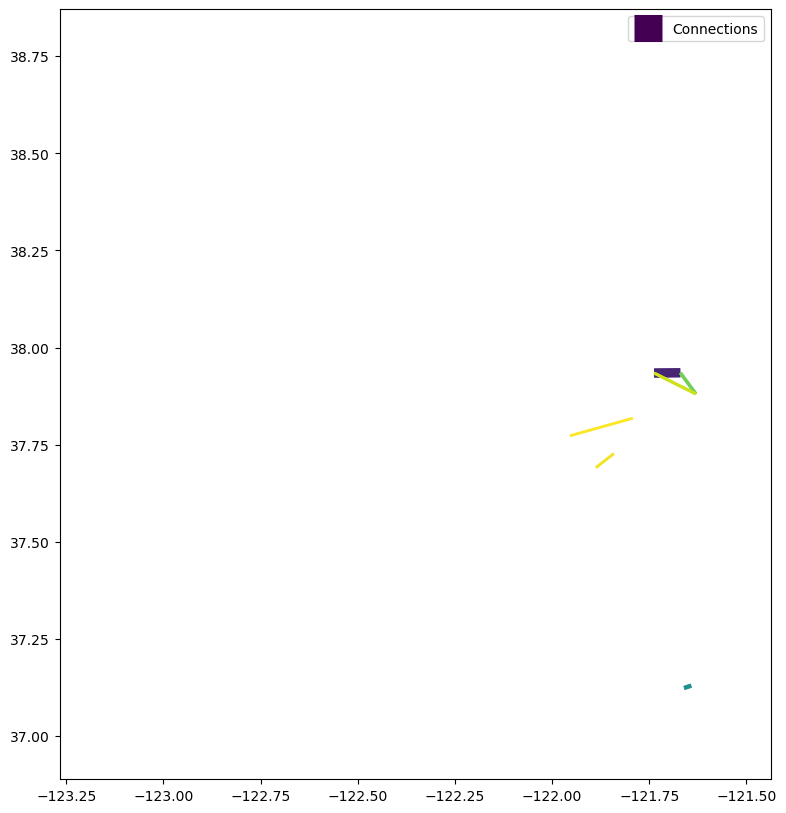

In [72]:
# Create a new GeoDataFrame for line segments
lines_gdf = gpd.GeoDataFrame(columns=['geometry', 'count'])

# Iterate through each row and create a LineString connecting the points
for i in range(len(x_points_gdf)):
    x_point, x_count = x_points_gdf.iloc[i]['geometry_x'], x_points_gdf.iloc[i]['count']
    y_point, y_count = y_points_gdf.iloc[i]['geometry_y'], y_points_gdf.iloc[i]['count']
    
    # Create LineString from the two points
    line = LineString([x_point, y_point])
    
    # Add the line to the GeoDataFrame along with the count value
    lines_gdf.loc[i] = {'geometry': line, 'count': min(x_count, y_count)}

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
lines_gdf.plot(ax=ax, linewidth=lines_gdf['count']/1000, cmap='viridis', legend=True, label='Connections')

# Show the plot
plt.legend()
plt.show()

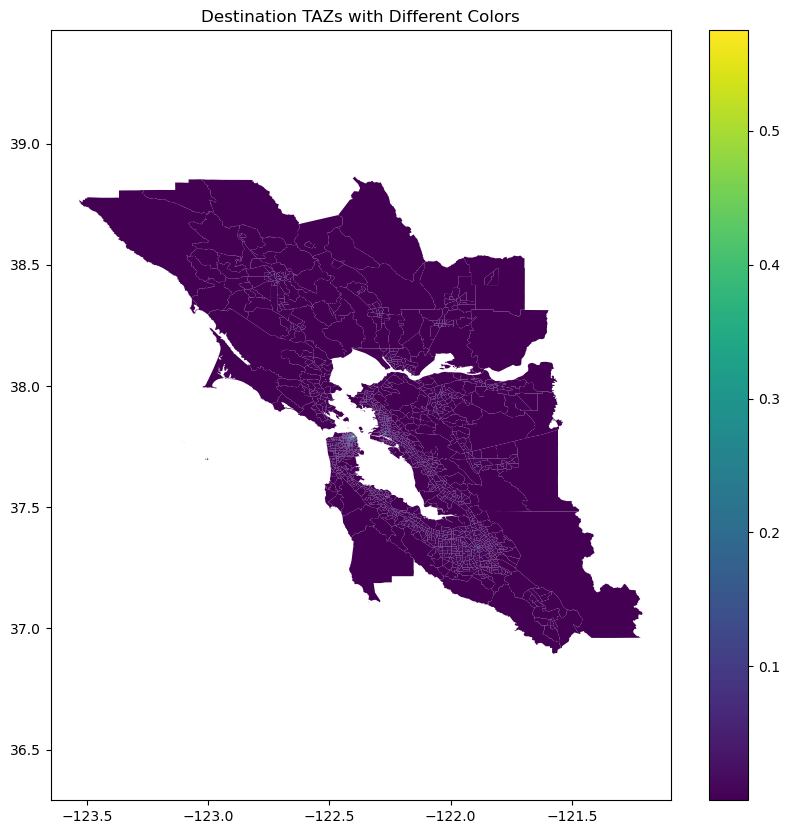

In [9]:
# Plot the GeoDataFrame with different colors for each row based on 'objectid'
gdf_polygons.plot(column='density', figsize=(10, 10), legend=True)

# Add title
plt.title('Destination TAZs with Different Colors')

# Optional: Set axes to be equal to keep the aspect ratio square
plt.axis('equal')

# Save figure
plt.savefig('destination_figure.jpeg')

# Show the plot
plt.show()


In [10]:
# Calculate the hour of departure and add it as a new column
dtaz['hour'] = (dtaz['deptm'] / 60).astype(int)


In [11]:
# Assuming longitude and latitude lists are correctly obtained from otaz DataFrame
gdf_points_dtaz = gpd.GeoDataFrame(dtaz, geometry=[Point(xy) for xy in zip(dtaz['lon'], dtaz['lat'])], crs="EPSG:4326")


In [12]:
import matplotlib.pyplot as plt
import geopandas as gpd
import imageio

def generate_frame(hour, output_path):
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.axis('equal')
    ax.set_aspect('equal')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    
    # Filter points for the current hour
    points_current_hour = gdf_points_dtaz[gdf_points_dtaz['hour'] == hour]
    
    # Perform a spatial join between points and polygons to find points within each polygon
    joined = gpd.sjoin(points_current_hour, counties_gdf, how='inner', op='within')
    
    # Count the number of points in each polygon for the current hour
    points_count = joined.groupby('taz1454').size().reset_index(name='points_count')
    
    # Merge this count back into the original polygons GeoDataFrame
    counties_with_counts = counties_gdf.merge(points_count, on='taz1454', how='left').fillna(0)

    counties_with_counts['density'] = counties_with_counts['points_count'] / counties_with_counts['area']
    
    # Plotting the heatmap based on 'points_count' with a fixed color bar range
    counties_with_counts.plot(column='density', ax=ax, legend=True, cmap='viridis', vmin=0, vmax=0.075,
                              legend_kwds={'label': "Density per TAZ", 'orientation': "horizontal"})
    
    # Set title dynamically with the hour
    ax.set_title(f'Hour: {hour} TAZs Density Heatmap - Destination', fontsize=15)
    
    # Save the figure
    plt.savefig(output_path)
    plt.close(fig)

# Assuming gdf_points_otaz and counties_gdf are already defined and prepared
# Directory where the images will be saved and list to store image filenames
output_dir = 'taz_density_heatmap_pictures_fixed'
image_files = []

# Generate and save a frame for each hour
for hour in sorted(gdf_points_dtaz['hour'].unique()):
    output_path = f'{output_dir}/frame_{hour}.png'
    generate_frame(hour, output_path)
    image_files.append(output_path)

# Create a GIF from the saved images using imageio
gif_path = 'taz_demsity_heatmap_animation_fixed.gif'
duration_per_frame = 1000 / 2  # 500ms per frame for 2fps

with imageio.get_writer(gif_path, mode='I', duration=duration_per_frame) as writer:
    for filename in image_files:
        image = imageio.imread(filename)
        writer.append_data(image)


/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: FutureWarning: The `op` parameter i

In [13]:
import matplotlib.pyplot as plt
import geopandas as gpd
import imageio

# Assuming gdf_points_otaz and counties_gdf are already defined and in the correct CRS

def generate_frame(hour, output_path):
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.axis('equal')  # Ensure the plot maintains a square aspect ratio
    ax.set_aspect('equal')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    
    # Filter points for the current hour
    points_current_hour = gdf_points_dtaz[gdf_points_dtaz['hour'] == hour]
    
    # Perform a spatial join between points and polygons to find points within each polygon
    joined = gpd.sjoin(points_current_hour, counties_gdf, how='inner', op='within')
    
    # Count the number of points in each polygon for the current hour
    points_count = joined.groupby('taz1454').size().reset_index(name='points_count')
    
    # Merge this count back into the original polygons GeoDataFrame
    counties_with_counts = counties_gdf.merge(points_count, on='taz1454', how='left').fillna(0)

    counties_with_counts['density'] = counties_with_counts['points_count'] / counties_with_counts['area']
    
    # Plotting the heatmap based on 'points_count'
    counties_with_counts.plot(column='density', ax=ax, legend=True, cmap='viridis',
                              legend_kwds={'label': "Density per TAZ", 'orientation': "horizontal"})
    
    # Set title dynamically with the hour
    ax.set_title(f'Hour: {hour} TAZs Density Heatmap - Destination', fontsize=15)
    
    # Save the figure
    plt.savefig(output_path)
    plt.close(fig)  # Close the figure to free up memory

# Directory where the images will be saved
output_dir = 'taz_density_heatmap_pictures'
image_files = []

# Generate and save a frame for each hour
for hour in sorted(gdf_points_dtaz['hour'].unique()):
    output_path = f'{output_dir}/frame_{hour}.png'
    generate_frame(hour, output_path)
    image_files.append(output_path)


/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: FutureWarning: The `op` parameter i

In [14]:
# Create a GIF from the saved images
gif_path = 'taz_density_heatmap_animation.gif'
# Calculate duration based on desired fps
fps = 2
duration_per_frame = 1000 / fps  # Duration in milliseconds

with imageio.get_writer(gif_path, mode='I', duration=duration_per_frame) as writer:
    for filename in image_files:
        image = imageio.imread(filename)
        writer.append_data(image)


/var/folders/bd/fq3z0ph13ms3dnbk1fhkkpkw0000gn/T/ipykernel_2208/1119619043.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
